# Credit Card Fraud Detection Using Machine Learning in the Cloud

Credit card fraud has been a problem for businesses and financial institutions for decades, resulting, in recent years, in billions of dollars in losses on a yearly basis. To take on the large amount of data generated around financial transactions, large computing resources will be required. Additionally, to review large numbers of transactions in an efficient and timely manner, human review would not be suitable. Therefore, to address these challenges machine learning in the cloud seems to be the solution. With this project, we will be developing a machine learning model which accurately identifies fraudulent credit card transactions and deploy it to the cloud.

### Objectives
* Find the best model of Credit Card Fraud Prediction
* Compare Features importance
* Data Cleaning and Exploration
* Resampling Data
* Manage Imbalance Data
* Use a List of data that was never used in the train model (slice).


### Import libraries

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, date
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load the File

In [2]:
train = pd.read_csv('fraudTrain.csv')
test = pd.read_csv('fraudTest1.csv')
#This file slice is used for evaluation of the model
slice = pd.read_csv('slice2000.csv')

In [3]:
train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


### Creating the Dataframe and start the dataset from column 1 to remove the column Unnamed

In [4]:
df_train = train.iloc[0:,1:]
df_test = test.iloc[20000:,1:]
df_slice = slice.iloc[0:,1:]
#Create a copy of the dataset in order to compare different ML models
df_train1 = df_train.copy()
df_test1 = df_test.copy()
df_train.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0



### Functions that will be used to transform and analys the data


In [5]:
def is_weekend(tx_datetime):
    
    # Convert date into weekday (0 is Monday, 6 is Sunday)
    weekday = tx_datetime.weekday()
    # Binary value: 0 if weekday, 1 if weekend
    is_weekend = weekday>=5
    
    return int(is_weekend)

def is_night(tx_datetime):
    
    # Get the hour of the transaction
    tx_hour = tx_datetime.hour
    # Binary value: 1 if hour less than 6am and more than 10pm, and 0 otherwise
    is_night = (tx_hour<=6 and tx_hour>=22)
    
    return int(is_night)

def show_status(df):
    
    #Get the status about null values, cell type
    total_null = df.isnull().sum()
    percent_null = 100* (total_null/len(df))
    cell_type = df.dtypes
    unique_values = df.nunique()

    new_table = pd.concat([total_null,percent_null,cell_type,unique_values], axis=1)
    tb_columns = new_table.rename(columns = {0: 'Null Values', 1: '% of Null Values', 2: 'Type', 3:'Unique Values'})
    
    return tb_columns

#function to return highly correlated column above a threshold
def correlation(dataset, threshold):
    col_corr = set() # This set stores the highly correlated columns
    corr_matrix = dataset.corr() #correlation matrix
    #traversing the correlation matrix
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                colname = corr_matrix.columns[i] #selecting columns above threshold
                col_corr.add(colname) #adding columns to set
    return col_corr



###  Exploration


In [6]:
show_status(df_train)

,Null Values,% of Null Values,Type,Unique Values
trans_date_trans_time,0,0.0,object,1274791
cc_num,0,0.0,int64,983
merchant,0,0.0,object,693
category,0,0.0,object,14
amt,0,0.0,float64,52928
first,0,0.0,object,352
last,0,0.0,object,481
gender,0,0.0,object,2
street,0,0.0,object,983
city,0,0.0,object,894



We can notice that we don't have any Null values and a variaty of non numeric columns


The Label "is_fraud" is the value that we want to predict and the other columns are the values that we are going to determine the best features for the machine learning model.




### Rename Columns


In [7]:
#train dataset
df_train.rename(columns={'trans_date_trans_time':'TX_DATETIME','cc_num':'ACCOUNT','amt':'AMOUNT', 'category':'CATEGORY'}, inplace=True)
#test dataset
df_test.rename(columns={'trans_date_trans_time':'TX_DATETIME','cc_num':'ACCOUNT','amt':'AMOUNT', 'category':'CATEGORY'}, inplace=True)


### Data Visualization
Find the measures linear correlation between two variables


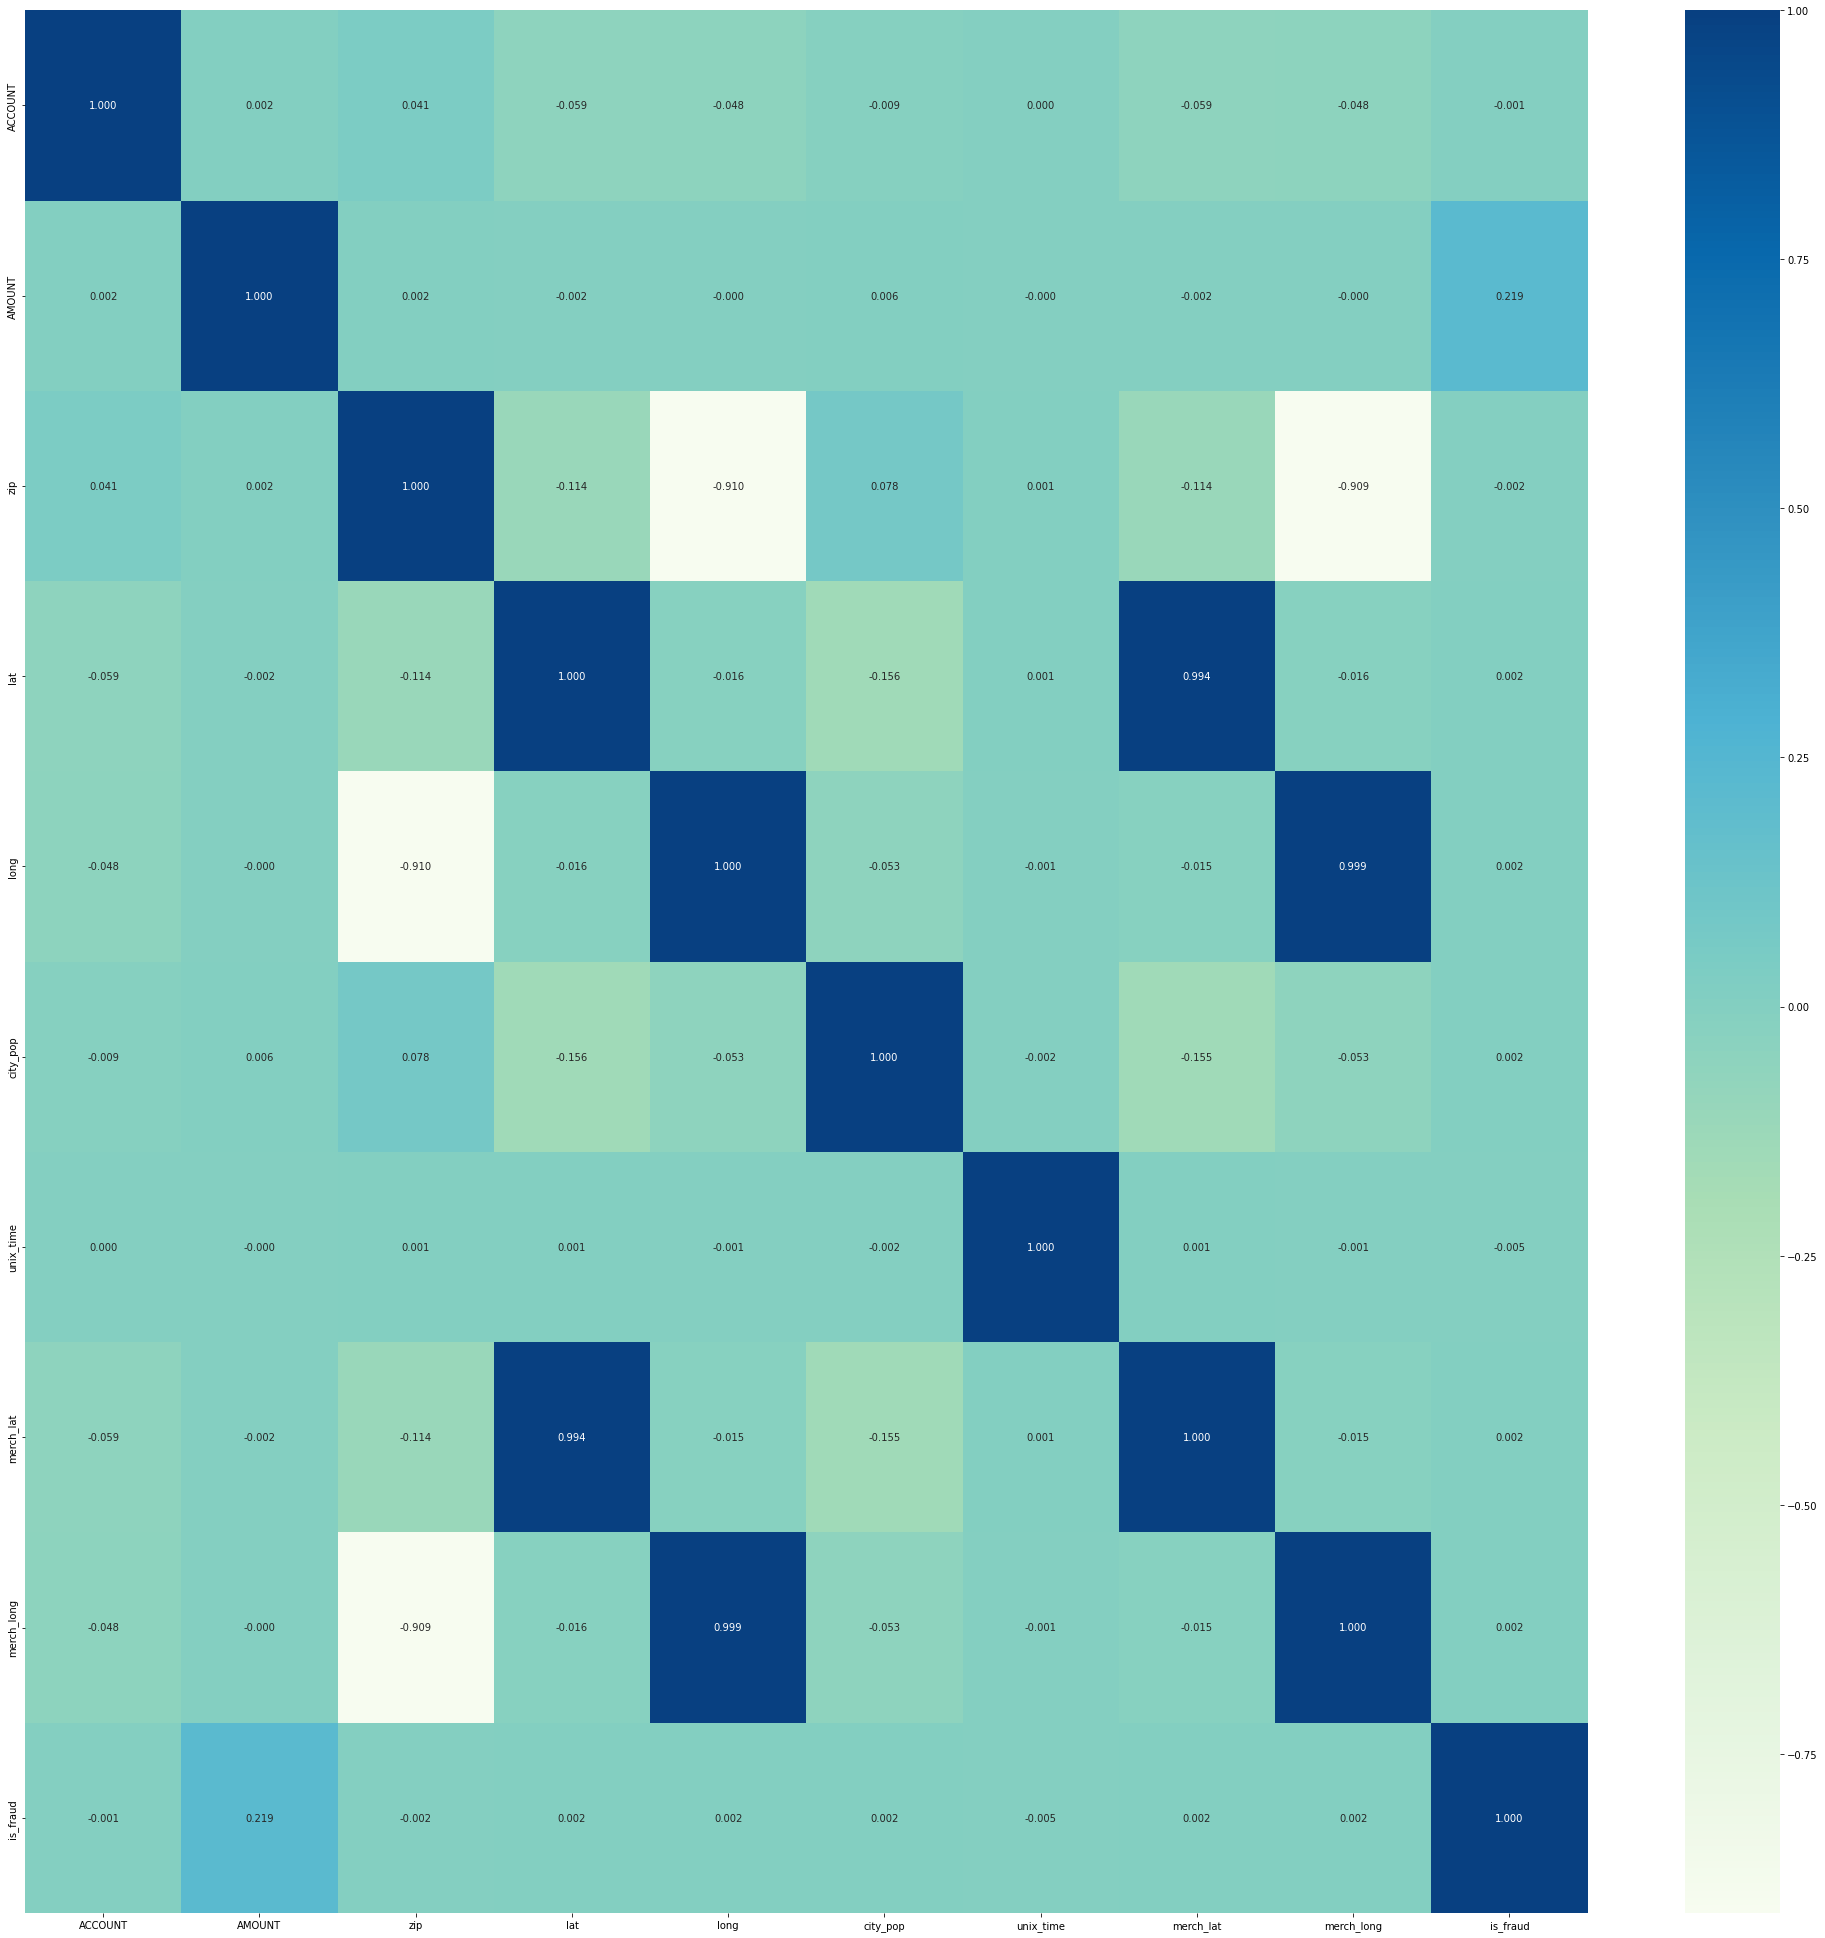

In [8]:
#df_train.corr()
plt.figure(figsize = (35,35))
sns.heatmap(df_train.corr(),annot = True, cmap="GnBu",fmt='.3f')
plt.show()

In [9]:
#let us get the features with correlation above 85%
corr_features = correlation(df_train,0.85)
corr_features

{'merch_lat', 'merch_long'}

In [10]:
corr_test = correlation(df_test,0.85)
corr_test

{'merch_lat', 'merch_long'}

In [11]:
#we need to delete merch_lat and merch_long

In [12]:
#Number of lines and columns
#Train dataset
df_train[df_train.is_fraud == 1].shape, df_train[df_train.is_fraud == 0].shape

((7506, 22), (1289169, 22))


### Dataset Analysis


In [13]:
#train dataset
num_true_cases = len(df_train[df_train.is_fraud == 1])
num_false_cases = len(df_train[df_train.is_fraud == 0])
print('TRAINING - Number of Fraud cases:',num_true_cases,'-', np.round(num_true_cases / df_train.shape[0] * 100,2),'%')
print('TRAINING - Number of Normal cases:', num_false_cases,'-',np.round(num_false_cases / df_train.shape[0] * 100,2),'%')

#test dataset
num_true_cases = len(df_test[df_test.is_fraud == 1])
num_false_cases = len(df_test[df_test.is_fraud == 0])
print('TESTING - Number of Fraud cases:',num_true_cases,'-', np.round(num_true_cases / df_test.shape[0] * 100,2),'%')
print('TESTING - Number of Normal cases:', num_false_cases,'-',np.round(num_false_cases / df_test.shape[0] * 100,2),'%')

TRAINING - Number of Fraud cases: 7506 - 0.58 %
TRAINING - Number of Normal cases: 1289169 - 99.42 %
TESTING - Number of Fraud cases: 1977 - 0.38 %
TESTING - Number of Normal cases: 513742 - 99.62 %



It is clear that the amount of fraudulent transactions is not balanced


In [14]:
df_test[df_test.is_fraud == 1]

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
20837,2020-07-05 17:04:01,4989847570577635369,"fraud_McDermott, Osinski and Morar",home,252.48,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,34.1832,-81.5324,8333,Archaeologist,1994-07-09,9b3c14d97332ea51409c55a4051d43a9,1373043841,34.278473,-80.690750,1
21719,2020-07-05 22:13:31,4989847570577635369,fraud_Kozey-Kuhlman,personal_care,21.11,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,34.1832,-81.5324,8333,Archaeologist,1994-07-09,db58a9737e9c64eabcf5b5671e5e45e3,1373062411,34.658999,-81.376431,1
21762,2020-07-05 22:29:31,4462038234743679432,fraud_Roberts-Beahan,misc_pos,51.79,Kimberly,Bush,F,6027 Scott Meadows Suite 494,Dell City,...,31.9240,-105.2099,579,Hydrogeologist,1945-11-26,15c478b387213744e5f32e43aae247c2,1373063371,32.128386,-105.636375,1
21808,2020-07-05 22:49:40,4989847570577635369,fraud_Cartwright PLC,kids_pets,19.44,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,34.1832,-81.5324,8333,Archaeologist,1994-07-09,418f9df03ce9c83407f01a23d725c421,1373064580,34.216526,-81.815763,1
21887,2020-07-05 23:14:28,4989847570577635369,"fraud_Streich, Rolfson and Wilderman",kids_pets,17.05,Vanessa,Anderson,F,21178 Brittney Locks,Prosperity,...,34.1832,-81.5324,8333,Archaeologist,1994-07-09,7aa13ea1866b4a78e76bc68ce8ca95be,1373066068,33.595052,-82.012200,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
497274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
497341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
497529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,Senatobia,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1



We can find the total of fraudulent transaction in the test dataset


### Data Tranformation
* We use the functions to transform the data type of the column date and add new columns TX_DATETIME, Transaction_Date and Age



In [15]:
#train dataset
df_train['TX_DATETIME'] = pd.to_datetime(df_train['TX_DATETIME'], errors='coerce')
df_train['dob'] = pd.to_datetime(df_train['dob'], errors='coerce')
df_train['Transaction_Date'] = (df_train['TX_DATETIME']).dt.date.astype('datetime64[ns]')
#Manually calculate the age - seems to be faster
df_train['Age'] = pd.Timestamp('now').year - df_train['dob'].dt.year

#test dataset
df_test['TX_DATETIME'] = pd.to_datetime(df_test['TX_DATETIME'], errors='coerce')
df_test['dob'] = pd.to_datetime(df_test['dob'], errors='coerce')
df_test['Transaction_Date'] = (df_test['TX_DATETIME']).dt.date.astype('datetime64[ns]')

#Manually calculate the age - seems to be faster
df_test['Age'] = pd.Timestamp('now').year - df_test['dob'].dt.year


In [16]:
#Data Tranformation

#It takes 4 sec because it does comparation with the functions
%time df_train['TX_DURING_WEEKEND']=df_train.TX_DATETIME.apply(is_weekend)
%time df_train['TX_DURING_NIGHT']=df_train.TX_DATETIME.apply(is_night)
#it takes 90ms because it only converts the values using dt properties
%time df_train['DAY'] = df_train['TX_DATETIME'].dt.day
%time df_train['MONTH'] = df_train['TX_DATETIME'].dt.month
%time df_train['YEAR'] = df_train['TX_DATETIME'].dt.year


df_test['TX_DURING_WEEKEND']=df_test.TX_DATETIME.apply(is_weekend)
df_test['TX_DURING_NIGHT']=df_test.TX_DATETIME.apply(is_night)
df_test['DAY'] = df_test['TX_DATETIME'].dt.day
df_test['MONTH'] = df_test['TX_DATETIME'].dt.month
df_test['YEAR'] = df_test['TX_DATETIME'].dt.year

Wall time: 4.91 s
Wall time: 4.72 s
Wall time: 89 ms
Wall time: 91 ms
Wall time: 102 ms


In [17]:
#Data Tranformation

#If I want to check the elapse of days since the first day from the dataset
df_train_min = min(df_train['TX_DATETIME'])
df_test_min = min(df_test['TX_DATETIME'])

df_train['TX_TIME_DAYS'] = [int(i.days) for i in (df_train['TX_DATETIME']) - df_train_min]
df_test['TX_TIME_DAYS'] = [int(i.days) for i in (df_test['TX_DATETIME']) - df_test_min]

df_train.head(2)

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,merch_long,is_fraud,Transaction_Date,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,TX_TIME_DAYS
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019-01-01,34,0,0,1,1,2019,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,2019-01-01,44,0,0,1,1,2019,0


In [18]:
df_test.head(1)

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,merch_long,is_fraud,Transaction_Date,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,TX_TIME_DAYS
20000,2020-07-05 12:13:02,6011693194885790,fraud_Lesch Ltd,shopping_pos,7.03,Victoria,Fleming,F,2807 Parker Station Suite 080,Stanchfield,...,-93.458067,0,2020-07-05,27,1,0,5,7,2020,0


## check the class imbalance

In [19]:
fraud_train = df_train.is_fraud.value_counts()
print (fraud_train)
print ("Minority class represents just ",(fraud_train[1]/len(df_train))*100, " % of the dataset")

0    1289169
1       7506
Name: is_fraud, dtype: int64
Minority class represents just  0.5788651743883394  % of the dataset


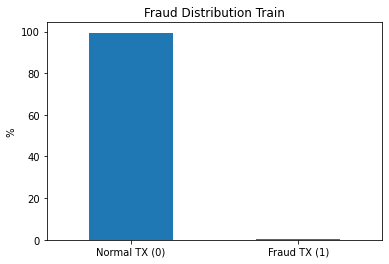

In [20]:
#Class Imbalance - Train
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)/len(df_train)*100
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Fraud Distribution Train")
LABELS = ["Normal TX (0)", "Fraud TX (1)"]
plt.xticks(range(2), LABELS)
plt.ylabel(" % ")
plt.show()

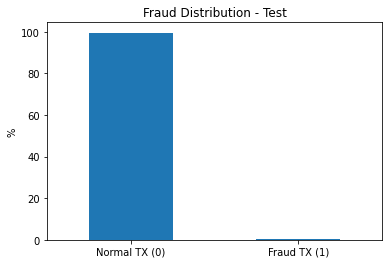

In [21]:
#Class Imbalance - Test
count_classes = pd.value_counts(df_test['is_fraud'], sort = True)/len(df_test)* 100
count_classes.plot(kind = 'bar', rot = 0)
plt.title("Fraud Distribution - Test")
LABELS = ["Normal TX (0)", "Fraud TX (1)"]
plt.xticks(range(2), LABELS)
plt.ylabel("%")
plt.show()

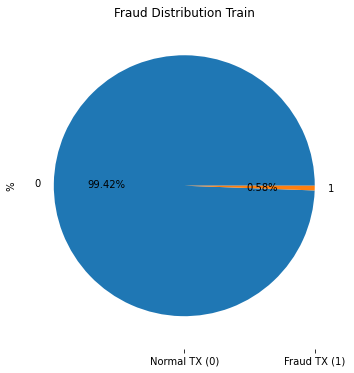

In [22]:
#Class Imbalance - Train
count_classes = pd.value_counts(df_train['is_fraud'], sort = True)/len(df_train)*100
count_classes.plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraud Distribution Train")
LABELS = ["Normal TX (0)", "Fraud TX (1)"]
plt.xticks(range(2), LABELS)
plt.ylabel(" % ")
plt.show()

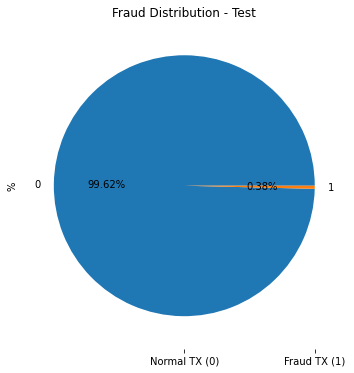

In [23]:
#Class Imbalance - Test
count_classes = pd.value_counts(df_test['is_fraud'], sort = True)/len(df_test)* 100
count_classes.plot(kind='pie', figsize=(6, 6), autopct='%1.2f%%')
plt.title("Fraud Distribution - Test")
LABELS = ["Normal TX (0)", "Fraud TX (1)"]
plt.xticks(range(2), LABELS)
plt.ylabel("%")
plt.show()

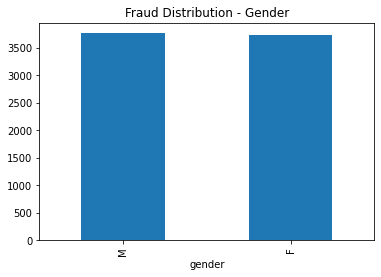

In [24]:
#Class Imbalance - Test
count_classes = df_train.groupby('gender')['is_fraud'].sum().sort_values(ascending=False)
count_classes.plot(kind='bar', figsize=(6,4))
plt.title("Fraud Distribution - Gender")
LABELS = ["M", "F"]
plt.xticks(range(2), LABELS)
plt.show()



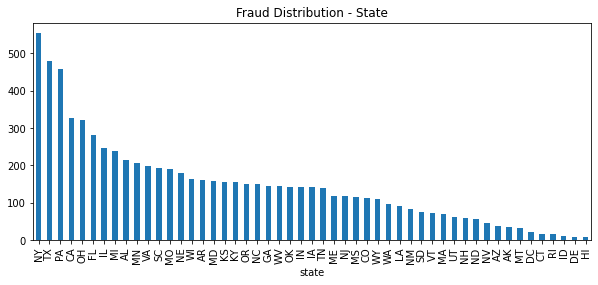

In [25]:
#Class Imbalance - Test
count_classes = df_train.groupby('state')['is_fraud'].sum().sort_values(ascending=False)
count_classes.plot(kind='bar', figsize=(10,4))
plt.title("Fraud Distribution - State")
plt.show()

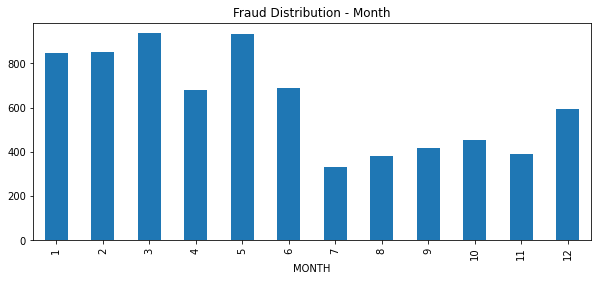

In [26]:
#Class Imbalance - Test
count_classes = df_train.groupby('MONTH')['is_fraud'].sum()
count_classes.plot(kind='bar', figsize=(10,4))
plt.title("Fraud Distribution - Month")
plt.show()

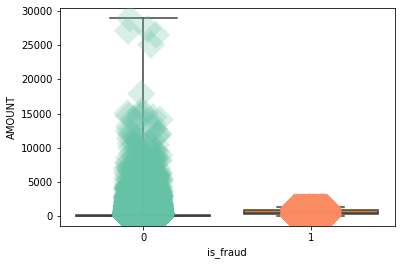

In [27]:
# Distribution of Transaction time for transactions
ax = sns.boxplot(x=df_train['is_fraud'], y=df_train['AMOUNT'], data=df_train, whis=np.inf)
ax = sns.stripplot(x=df_train['is_fraud'], y=df_train['AMOUNT'], data=df_train, palette="Set2", size=20, marker="D",
                   edgecolor="gray", alpha=.25)

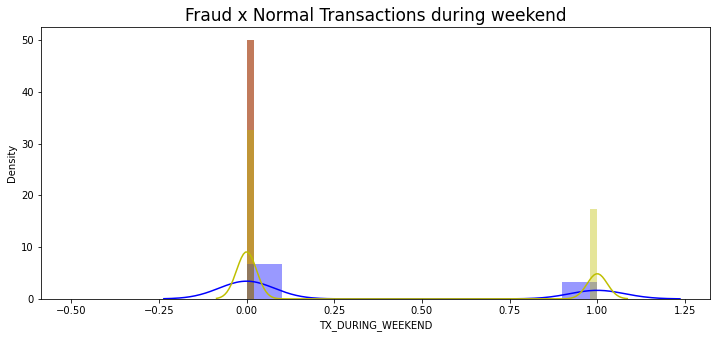

In [28]:
plt.figure(figsize=(12,5))
sns.distplot(df_train[df_train['is_fraud'] == 0]["TX_DURING_NIGHT"], color='g')
sns.distplot(df_train[df_train['is_fraud'] == 1]["TX_DURING_NIGHT"], color='r')
sns.distplot(df_train[df_train['is_fraud'] == 1]["TX_DURING_WEEKEND"], color='b')
sns.distplot(df_train[df_train['is_fraud'] == 0]["TX_DURING_WEEKEND"], color='y')
plt.title('Fraud x Normal Transactions during weekend', fontsize=17)

plt.show()

In [29]:
df_train.head(1)

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,merch_long,is_fraud,Transaction_Date,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,TX_TIME_DAYS
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019-01-01,34,0,0,1,1,2019,0


<AxesSubplot:title={'center':'Number of frauds by category'}, xlabel='CATEGORY', ylabel='is_fraud'>

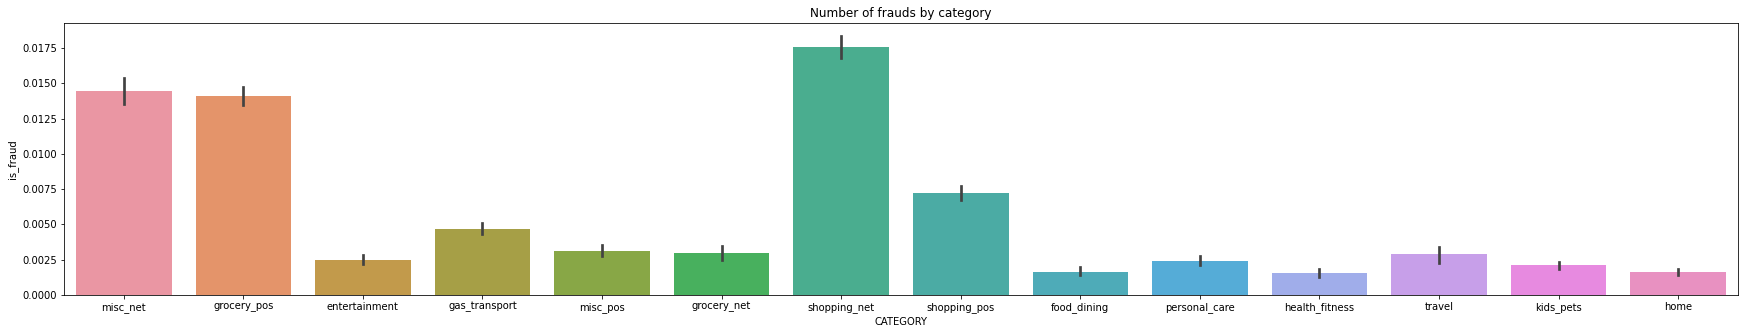

In [30]:
# Distribution of Transaction time for Category
plt.figure(figsize=(30,5))
plt.title('Number of frauds by category')
sns.barplot(x=df_train['CATEGORY'], y=df_train['is_fraud'] ,data=df_train)



Features Select
In this Machine Learning model we are removing a few columns that doesn't add any value to the train model 


In [31]:
#Data Tranformation
#drop columns that are not required for the model
df_train.drop(['dob','Transaction_Date','TX_DATETIME', 'ACCOUNT', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'] , axis=1, inplace=True)
df_test.drop(['dob','Transaction_Date','TX_DATETIME', 'ACCOUNT', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'] , axis=1, inplace=True)

show_status(df_train)


,Null Values,% of Null Values,Type,Unique Values
merchant,0,0.0,object,693
CATEGORY,0,0.0,object,14
AMOUNT,0,0.0,float64,52928
gender,0,0.0,object,2
state,0,0.0,object,51
is_fraud,0,0.0,int64,2
Age,0,0.0,int64,81
TX_DURING_WEEKEND,0,0.0,int64,2
TX_DURING_NIGHT,0,0.0,int64,1
DAY,0,0.0,int64,31


In [32]:
print("Number of is_fraud data",df_train['is_fraud'].value_counts())

Number of is_fraud data 0    1289169
1       7506
Name: is_fraud, dtype: int64



### Encoding Nominal Columns


In [33]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
ohe.fit(df_train[['CATEGORY']])

"""
#This function allow us to pass a dataframe that has the column name "Category" and transform the values into numerical values
It encodes the column into integer values using the OneHotEncoder from Scikitlearn
"""
def get_ohe(df):
    temp_df = pd.DataFrame(data=ohe.transform(df[['CATEGORY']]), columns=ohe.get_feature_names_out())
    df.drop(columns=['CATEGORY'], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df


df_train = get_ohe(df_train)
df_test = get_ohe(df_test)

In [34]:
df_downsampled = df_train
df_downsampled

,merchant,AMOUNT,gender,state,is_fraud,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,...,CATEGORY_grocery_pos,CATEGORY_health_fitness,CATEGORY_home,CATEGORY_kids_pets,CATEGORY_misc_net,CATEGORY_misc_pos,CATEGORY_personal_care,CATEGORY_shopping_net,CATEGORY_shopping_pos,CATEGORY_travel
0,"fraud_Rippin, Kub and Mann",4.97,F,NC,0,34,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"fraud_Heller, Gutmann and Zieme",107.23,F,WA,0,44,0,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fraud_Lind-Buckridge,220.11,M,ID,0,60,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"fraud_Kutch, Hermiston and Farrell",45.00,M,MT,0,55,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fraud_Keeling-Crist,41.96,M,VA,0,36,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,15.56,M,UT,0,61,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296671,fraud_Abernathy and Sons,51.70,M,MD,0,43,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296672,fraud_Stiedemann Ltd,105.93,M,NM,0,55,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296673,"fraud_Reinger, Weissnat and Strosin",74.90,M,SD,0,42,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
#Gender
#Change gender from nominal to numerical
# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
df_test['gender'] = df_test['gender'].replace(['F','M'],[0,1])

Feature Selection
We can identify new columns that were created by the OneHotEncoder

In [36]:
#Select Data
select_data = df_downsampled
select_data.columns

Index(['merchant', 'AMOUNT', 'gender', 'state', 'is_fraud', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'TX_TIME_DAYS', 'CATEGORY_entertainment', 'CATEGORY_food_dining',
       'CATEGORY_gas_transport', 'CATEGORY_grocery_net',
       'CATEGORY_grocery_pos', 'CATEGORY_health_fitness', 'CATEGORY_home',
       'CATEGORY_kids_pets', 'CATEGORY_misc_net', 'CATEGORY_misc_pos',
       'CATEGORY_personal_care', 'CATEGORY_shopping_net',
       'CATEGORY_shopping_pos', 'CATEGORY_travel'],
      dtype='object')

In [37]:
select_data = select_data[['merchant', 'AMOUNT', 'gender', 'state', 'is_fraud', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel']]
select_data

,merchant,AMOUNT,gender,state,is_fraud,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,...,CATEGORY_grocery_pos,CATEGORY_health_fitness,CATEGORY_home,CATEGORY_kids_pets,CATEGORY_misc_net,CATEGORY_misc_pos,CATEGORY_personal_care,CATEGORY_shopping_net,CATEGORY_shopping_pos,CATEGORY_travel
0,"fraud_Rippin, Kub and Mann",4.97,0,NC,0,34,0,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,"fraud_Heller, Gutmann and Zieme",107.23,0,WA,0,44,0,0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,fraud_Lind-Buckridge,220.11,1,ID,0,60,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"fraud_Kutch, Hermiston and Farrell",45.00,1,MT,0,55,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,fraud_Keeling-Crist,41.96,1,VA,0,36,0,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,15.56,1,UT,0,61,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296671,fraud_Abernathy and Sons,51.70,1,MD,0,43,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296672,fraud_Stiedemann Ltd,105.93,1,NM,0,55,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1296673,"fraud_Reinger, Weissnat and Strosin",74.90,1,SD,0,42,1,0,21,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
 select_data.columns

Index(['merchant', 'AMOUNT', 'gender', 'state', 'is_fraud', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel'],
      dtype='object')

In [39]:
from sklearn.model_selection import train_test_split
feature_cols = ['AMOUNT', 'gender', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel']
X = select_data[feature_cols]
y = select_data['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=30)

In [40]:
X_train

,AMOUNT,gender,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,CATEGORY_food_dining,CATEGORY_gas_transport,...,CATEGORY_grocery_pos,CATEGORY_health_fitness,CATEGORY_home,CATEGORY_kids_pets,CATEGORY_misc_net,CATEGORY_misc_pos,CATEGORY_personal_care,CATEGORY_shopping_net,CATEGORY_shopping_pos,CATEGORY_travel
1099647,65.76,0,35,0,0,2,4,2020,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905221,132.35,0,66,1,0,28,12,2019,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1114636,5.49,0,54,0,0,8,4,2020,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
666118,71.64,1,56,0,0,11,10,2019,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508851,36.38,0,56,0,0,9,8,2019,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,4.69,0,34,0,0,22,4,2019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
882485,4.37,1,23,1,0,22,12,2019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
328599,8.70,1,53,0,0,5,6,2019,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
570508,28.84,0,66,0,0,30,8,2019,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0



Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. We use the sklearn MinMaxScaler


In [41]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
total = np.count_nonzero(y_test == 1)
total

2259

In [43]:
total = np.count_nonzero(y_test == 0)
total

386744


In order to deal with the use the Sampling technique SMOTE (Synthetic Minority Oversampling TEchnique) that consists of synthesizing elements
for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this
point. The synthetic points are added between the chosen point and its neighbors.
This technique generates synthetic data for the minority class. https://imbalancedlearn.readthedocs.io/en/stable/generated/imblearn.over_sampling.SMOTE.html


In [44]:
from imblearn.over_sampling import SMOTE
#balancing using SMOTE method
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [45]:
y_train.value_counts()

0    902425
1    902425
Name: is_fraud, dtype: int64

### Model

DecisionTreeClassifier
We compared the model using entropy and gini for the Attribute Selection. 
The entropy is a measure of the randomness in the information being processed that vary from 0 to 1.
The gini Selection would also vary with values from 0 to 1. Gini select the class with the least value of gini index that get prefered when they are being ranked.

1 - criterion="entropy", max_depth=10,random_state=42, class_weight='balanced'
* This was the best configuration for our model, if we reduce the number of max_depth to 6, the recall reduces to 80%.

2 - criterion="gini", max_depth=20,random_state=42
* This configuration didn't provide good results and the recall was below 70 %



In [46]:
#Learning with Imbalanced Data
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
# class_weight='balanced' to balance the classes which we have 0 and 1 in the outcome column
model = DecisionTreeClassifier(criterion="entropy", max_depth=10,random_state=42, class_weight='balanced')
model = model.fit(X_train, y_train)

Confusion Matrix
- Accuracy
- Precision
- Recall

In [47]:
# Accuracy of train data
y_pred_train = model.predict(X_train)
print("Accuracy Train Data:",metrics.accuracy_score(y_train, y_pred_train))

# Accuracy of test data
y_pred_test = model.predict(X_test)
print("Accuracy Test Data:",metrics.accuracy_score(y_test, y_pred_test))

Accuracy Train Data: 0.9649788071030834
Accuracy Test Data: 0.9623216273396349


In [48]:
from sklearn.metrics import confusion_matrix
# Train data
print("Confusion Matrix")
pd.DataFrame(confusion_matrix(y_train,y_pred_train), columns=['Predicted Nagative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

Confusion Matrix


,Predicted Nagative,Predicted Positive
Actual Negative,868798,33627
Actual Positive,29581,872844


In [49]:
# Train data
print('Classifiaction report: \n', metrics.classification_report(y_train,y_pred_train))

Classifiaction report: 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96    902425
           1       0.96      0.97      0.97    902425

    accuracy                           0.96   1804850
   macro avg       0.96      0.96      0.96   1804850
weighted avg       0.96      0.96      0.96   1804850



In [50]:
# Test data
print("Confusion Matrix")
pd.DataFrame(confusion_matrix(y_test,y_pred_test), columns=['Predicted Nagative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

Confusion Matrix


,Predicted Nagative,Predicted Positive
Actual Negative,372207,14537
Actual Positive,120,2139



The test dataset has around 2,259 fraudlent records and the ML model was able to identify 2139, It predicted incorrectly around 120. 
Also, the ML model falsily predicted 14537 normal transcation as fraudlents that would be around 0.039% of the total number of transactions.


In [51]:
# Test data
print('Classifiaction report: \n', metrics.classification_report(y_test,y_pred_test))

Classifiaction report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98    386744
           1       0.13      0.95      0.23      2259

    accuracy                           0.96    389003
   macro avg       0.56      0.95      0.60    389003
weighted avg       0.99      0.96      0.98    389003




The DecisionTreeClassifier Algorithms have been implemented upon the processed train dataset and we used the test using the test dataset. Based on the metrics, we can see that the model provide a high recall values that this means that it can identify when the fradulent transaction is actually yes.


### Here we are going to evaluate the model with 20.000 transactions that weren't used in the train model


In [52]:
import pandas as pd

df_sample = df_slice
df_sample.rename(columns={'trans_date_trans_time':'TX_DATETIME','cc_num':'ACCOUNT','amt':'AMOUNT', 'category':'CATEGORY'}, inplace=True)
df_sample

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2020-06-28 12:19:29,3514865930894695,fraud_Bednar PLC,kids_pets,14.18,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,d4d106d5c9ffc1701c5f09afc2508685,1372421969,32.562022,-106.265694,0
19996,2020-06-28 12:19:41,3514897282719543,fraud_Lubowitz-Walter,kids_pets,98.79,Steven,Faulkner,M,841 Cheryl Centers Suite 115,Farmington,...,42.9580,-77.3083,10717,Cytogeneticist,1952-10-13,229e743464bd721b5654c4b196387291,1372421981,42.193183,-78.054448,0
19997,2020-06-28 12:21:01,4584931703207308232,fraud_Stamm-Rodriguez,misc_pos,46.10,Amanda,Gomez,F,8152 Brittany Centers,Dallas,...,32.8463,-96.6972,1263321,"Designer, ceramics/pottery",1975-04-16,877fbd4ffa4750c24a6a18244b079bba,1372422061,32.729529,-97.358421,0
19998,2020-06-28 12:21:17,36078114201167,"fraud_Schumm, McLaughlin and Carter",food_dining,22.89,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,37.2692,-82.9161,798,Facilities manager,1926-06-26,182ce724e8c30907706e40b7690a3999,1372422077,37.758363,-82.949838,0


### Data Tranformation
* We use the functions to transform the data type of the column date and add new columns TX_DATETIME, Transaction_Date and Age

In [53]:
df_sample['TX_DATETIME'] = pd.to_datetime(df_sample['TX_DATETIME'], errors='coerce')
df_sample['dob'] = pd.to_datetime(df_sample['dob'], errors='coerce')
df_sample['Transaction_Date'] = (df_sample['TX_DATETIME']).dt.date.astype('datetime64[ns]')
#Manually calculate the age - seems to be faster
df_sample['Age'] = pd.Timestamp('now').year - df_sample['dob'].dt.year

In [54]:
#It takes 4 sec because it does comparation with the functions
%time df_sample['TX_DURING_WEEKEND']=df_sample.TX_DATETIME.apply(is_weekend)
%time df_sample['TX_DURING_NIGHT']=df_sample.TX_DATETIME.apply(is_night)
#it takes 90ms because it only converts the values using dt properties
%time df_sample['DAY'] = df_sample['TX_DATETIME'].dt.day
%time df_sample['MONTH'] = df_sample['TX_DATETIME'].dt.month
%time df_sample['YEAR'] = df_sample['TX_DATETIME'].dt.year


Wall time: 111 ms
Wall time: 64 ms
Wall time: 1 ms
Wall time: 1.03 ms
Wall time: 1.03 ms


### Encoding Nominal Columns

In [55]:
# This line enconde the colum Category
df_sample = get_ohe(df_sample)

In [56]:
df_sample['is_fraud']

0        0
1        0
2        0
3        0
4        0
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: is_fraud, Length: 20000, dtype: int64

In [57]:
#Change gender from nominal to numerical

# Train data
df_sample['gender'] = df_sample['gender'].replace(['F','M'],[0,1])
# Test data
df_sample['gender'] = df_sample['gender'].replace(['F','M'],[0,1])

In [58]:
df_sample.drop(['dob','Transaction_Date','TX_DATETIME', 'ACCOUNT', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'] , axis=1, inplace=True)

select_data2 =df_sample
select_data2.columns

Index(['merchant', 'AMOUNT', 'gender', 'state', 'is_fraud', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_entertainment', 'CATEGORY_food_dining',
       'CATEGORY_gas_transport', 'CATEGORY_grocery_net',
       'CATEGORY_grocery_pos', 'CATEGORY_health_fitness', 'CATEGORY_home',
       'CATEGORY_kids_pets', 'CATEGORY_misc_net', 'CATEGORY_misc_pos',
       'CATEGORY_personal_care', 'CATEGORY_shopping_net',
       'CATEGORY_shopping_pos', 'CATEGORY_travel'],
      dtype='object')


We divide the dataset in x, y values. The Label "is_fraud" is the value that we want to predict and the other columns are the values that we are going to determine the best features for the machine learning model.


In [59]:
X = select_data2[feature_cols]
Y = select_data2['is_fraud']


In the next step we reindex the dataset in order to match the number of columns from the model


In [60]:
from sklearn import preprocessing
feature_cols = ['AMOUNT', 'gender', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel']

#Reindex is used in case that we don't find the column. This line will match all the columns from the model
X = X.reindex(columns=feature_cols).fillna(0)

# Normalization
X = scaler.transform(X)

In [61]:
X

array([[6.85871815e-05, 1.00000000e+00, 4.56790123e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.06347006e-03, 0.00000000e+00, 1.85185185e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.48531810e-03, 0.00000000e+00, 4.32098765e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.66305478e-03, 0.00000000e+00, 3.70370370e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.07190002e-04, 1.00000000e+00, 9.75308642e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.33947520e-04, 0.00000000e+00, 4.07407407e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [62]:
y_ = model.predict(X)
y_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
print("Accuracy Test Data:",metrics.accuracy_score(Y, y_))

Accuracy Test Data: 0.96345


We can verify that we have 20.000 records

In [64]:
len(y_)

20000

total = np.count_nonzero(y_ == 1)
total

In [65]:
total = np.count_nonzero(y_ == 0)
total

19211

In [66]:
print("Number of is_fraud data",df_sample['is_fraud'].value_counts())

Number of is_fraud data 0    19932
1       68
Name: is_fraud, dtype: int64


In [67]:
print('Classifiaction report: \n', metrics.classification_report(Y, y_))

Classifiaction report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     19932
           1       0.08      0.93      0.15        68

    accuracy                           0.96     20000
   macro avg       0.54      0.95      0.56     20000
weighted avg       1.00      0.96      0.98     20000



In [68]:
print("Confusion Matrix")

pd.DataFrame(confusion_matrix(Y, y_), columns=['Predicted Nagative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

Confusion Matrix


,Predicted Nagative,Predicted Positive
Actual Negative,19206,726
Actual Positive,5,63



The slice dataset has around 68 fraudlent records that we know and the ML model was able to identify 63, It predicted incorrectly around 5 records. 
Also, the ML model falsily predicted 726 normal transcation as fraudlents that would be around 0.029% of the total number of transactions.


TP = TRUE POSITIVE
TN = TRUE NEGATIVE
FP = FALSE POSITIVE
FN = FALSE NEGATIVE
#accuracy = (TP+TN)/Total

In [69]:
#Copy the results values from the table above

tp = 63
tn = 19206
fp = 726
fn = 5

total = tp+tn+fp+fn

actualPositive=tp+fp
actualNegative=fn+tn
predPositive = tp + fn
predNegative = fp + tn

acc = (tp+tn)/total
print(acc)

0.96345


In [70]:
#how often is wrong
rate = (fp+fn)/total
print(rate)

0.03655


In [71]:
#true positive rate
print((tp/actualPositive))

0.07984790874524715


In [72]:
#false positive rate
print((fp/actualNegative))

0.03779084899276456


#True negative rate
print((tn/actualNegative))

In [73]:
#recall
print(tp/(fn+tp))

0.9264705882352942


In the model above, it is clear that we have good precision and high value of recall that results in a good prediction model. Next, we compare the following models that didn't gave us good results.

* model = ExtraTreesClassifier()

* from sklearn.linear_model import LogisticRegression



In [74]:
#####################Different models with poor results


In [75]:
df_train = df_train1
df_test = df_test1

In [76]:

### Rename Columns


In [77]:
#df_train = df_train.drop('Unnamed: 0', axis=1)
#train dataset
df_train.rename(columns={'trans_date_trans_time':'TX_DATETIME','cc_num':'ACCOUNT','amt':'AMOUNT', 'category':'CATEGORY'}, inplace=True)
#test dataset
df_test.rename(columns={'trans_date_trans_time':'TX_DATETIME','cc_num':'ACCOUNT','amt':'AMOUNT', 'category':'CATEGORY'}, inplace=True)

### Data Tranformation
* We use the functions to transform the data type of the column date and add new columns TX_DATETIME, Transaction_Date and Age

In [78]:
#Data Tranformation

df_train['TX_DATETIME'] = pd.to_datetime(df_train['TX_DATETIME'], errors='coerce')
df_train['dob'] = pd.to_datetime(df_train['dob'], errors='coerce')
df_train['Transaction_Date'] = (df_train['TX_DATETIME']).dt.date.astype('datetime64[ns]')
#Manually calculate the age - seems to be faster
df_train['Age'] = pd.Timestamp('now').year - df_train['dob'].dt.year

df_test['TX_DATETIME'] = pd.to_datetime(df_test['TX_DATETIME'], errors='coerce')
df_test['dob'] = pd.to_datetime(df_test['dob'], errors='coerce')
df_test['Transaction_Date'] = (df_test['TX_DATETIME']).dt.date.astype('datetime64[ns]')
#Manually calculate the age - seems to be faster
df_test['Age'] = pd.Timestamp('now').year - df_test['dob'].dt.year

In [79]:
#Data Tranformation

#It takes 4 sec because it does comparation with the functions
%time df_train['TX_DURING_WEEKEND']=df_train.TX_DATETIME.apply(is_weekend)
%time df_train['TX_DURING_NIGHT']=df_train.TX_DATETIME.apply(is_night)
#it takes 90ms because it only converts the values using dt properties
%time df_train['DAY'] = df_train['TX_DATETIME'].dt.day
%time df_train['MONTH'] = df_train['TX_DATETIME'].dt.month
%time df_train['YEAR'] = df_train['TX_DATETIME'].dt.year


df_test['TX_DURING_WEEKEND']=df_test.TX_DATETIME.apply(is_weekend)
df_test['TX_DURING_NIGHT']=df_test.TX_DATETIME.apply(is_night)
df_test['DAY'] = df_test['TX_DATETIME'].dt.day
df_test['MONTH'] = df_test['TX_DATETIME'].dt.month
df_test['YEAR'] = df_test['TX_DATETIME'].dt.year

Wall time: 4.54 s
Wall time: 4.35 s
Wall time: 87 ms
Wall time: 88 ms
Wall time: 90 ms


In [80]:
#Data Tranformation

#If I want to check the elapse of days since the first day from the dataset
df_train_min = min(df_train['TX_DATETIME'])
df_test_min = min(df_test['TX_DATETIME'])

df_train['TX_TIME_DAYS'] = [int(i.days) for i in (df_train['TX_DATETIME']) - df_train_min]
df_test['TX_TIME_DAYS'] = [int(i.days) for i in (df_test['TX_DATETIME']) - df_test_min]

df_train.head(2)

,TX_DATETIME,ACCOUNT,merchant,CATEGORY,AMOUNT,first,last,gender,street,city,...,merch_long,is_fraud,Transaction_Date,Age,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,TX_TIME_DAYS
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-82.048315,0,2019-01-01,34,0,0,1,1,2019,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.186462,0,2019-01-01,44,0,0,1,1,2019,0


In [81]:
#drop column that we don't need
df_train.drop(['dob','Transaction_Date','TX_DATETIME', 'ACCOUNT', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'] , axis=1, inplace=True)
df_test.drop(['dob','Transaction_Date','TX_DATETIME', 'ACCOUNT', 'first', 'last', 'street', 'city', 'zip', 'lat', 'long', 'city_pop', 'job', 'trans_num', 'unix_time', 'merch_lat', 'merch_long'] , axis=1, inplace=True)

show_status(df_train)

,Null Values,% of Null Values,Type,Unique Values
merchant,0,0.0,object,693
CATEGORY,0,0.0,object,14
AMOUNT,0,0.0,float64,52928
gender,0,0.0,object,2
state,0,0.0,object,51
is_fraud,0,0.0,int64,2
Age,0,0.0,int64,81
TX_DURING_WEEKEND,0,0.0,int64,2
TX_DURING_NIGHT,0,0.0,int64,1
DAY,0,0.0,int64,31



In the previous model we have used the Sampling tecnique SMOTE and for the next model we are going to use the resample that sklearn provide


In [82]:
from sklearn.utils import resample 
df_minority = df_train[df_train.iloc[:,5].values==0] # .iloc[:,21] = is_fraud
df_majority = df_train[df_train.iloc[:,5].values==1] 

# Downsample majority class
df_minority_downsampled = resample(df_minority,
                                 n_samples=7506,     # to match minority class
                                 random_state=42)    # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_minority_downsampled, df_majority])
 
# Display new class counts
df_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15012 entries, 123118 to 1295733
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   merchant           15012 non-null  object 
 1   CATEGORY           15012 non-null  object 
 2   AMOUNT             15012 non-null  float64
 3   gender             15012 non-null  object 
 4   state              15012 non-null  object 
 5   is_fraud           15012 non-null  int64  
 6   Age                15012 non-null  int64  
 7   TX_DURING_WEEKEND  15012 non-null  int64  
 8   TX_DURING_NIGHT    15012 non-null  int64  
 9   DAY                15012 non-null  int64  
 10  MONTH              15012 non-null  int64  
 11  YEAR               15012 non-null  int64  
 12  TX_TIME_DAYS       15012 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 1.6+ MB


In [83]:
#The new dataframe show the same amout of fraud and non fraud values
print("Number of is_fraud data",df_downsampled['is_fraud'].value_counts())

Number of is_fraud data 0    7506
1    7506
Name: is_fraud, dtype: int64



### Encoding Nominal Columns

We are also change the technique for encoding the non numerical values. This time we are going to use the get_dummies from pandas.


In [84]:
#Data Tranformation

#Category (One-Hot Endcoding)
#Change Category's Nominal Data to numerical by One Hot Encoding

#train data
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df_downsampled.CATEGORY, prefix='CATEGORY', drop_first=True)
#one-hot encoding the gender variable

MONTH_onehot = pd.get_dummies(df_downsampled.MONTH, prefix='MONTH', drop_first=True)
#Age_onehot = pd.get_dummies(df_downsampled.Age, prefix='Age', drop_first=True)


df_downsampled = df_downsampled.join(category_onehot)
df_downsampled = df_downsampled.join(MONTH_onehot)
#df_downsampled = df_downsampled.join(Age_onehot)

In [85]:
#test data
#one-hot encoding the category variable
category_onehot = pd.get_dummies(df_test.CATEGORY, prefix='CATEGORY', drop_first=True)
#one-hot encoding the gender variable
MONTH_onehot = pd.get_dummies(df_test.MONTH, prefix='MONTH', drop_first=True)
#Age_onehot = pd.get_dummies(df_test.Age, prefix='Age', drop_first=True)


df_test = df_test.join(category_onehot)

df_test = df_test.join(MONTH_onehot)
#df_test = df_test.join(Age_onehot)

In [86]:
#Gender
#Change gender from nominal to numerical

# Train data
df_downsampled['gender'] = df_downsampled['gender'].replace(['F','M'],[0,1])
# Test data
df_test['gender'] = df_test['gender'].replace(['F','M'],[0,1])

print('Gender of train dataset', df_downsampled['gender'].value_counts())
print('Gender of test dataset', df_test['gender'].value_counts())


Gender of train dataset 0    8039
1    7135
Name: gender, dtype: int64
Gender of test dataset 0    282994
1    232725
Name: gender, dtype: int64


In [87]:
#Select Data
select_data = df_downsampled
select_data.columns

Index(['merchant', 'CATEGORY', 'AMOUNT', 'gender', 'state', 'is_fraud', 'Age',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'TX_TIME_DAYS', 'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel',
       'MONTH_2', 'MONTH_3', 'MONTH_4', 'MONTH_5', 'MONTH_6', 'MONTH_7',
       'MONTH_8', 'MONTH_9', 'MONTH_10', 'MONTH_11', 'MONTH_12'],
      dtype='object')


The following features will be selected to provide to the train model.

In [88]:
select_data = select_data[['AMOUNT', 'Age','gender',
       'TX_DURING_WEEKEND', 'TX_DURING_NIGHT', 'DAY', 'MONTH', 'YEAR',
       'CATEGORY_food_dining', 'CATEGORY_gas_transport',
       'CATEGORY_grocery_net', 'CATEGORY_grocery_pos',
       'CATEGORY_health_fitness', 'CATEGORY_home', 'CATEGORY_kids_pets',
       'CATEGORY_misc_net', 'CATEGORY_misc_pos', 'CATEGORY_personal_care',
       'CATEGORY_shopping_net', 'CATEGORY_shopping_pos', 'CATEGORY_travel',
       'is_fraud']]
select_data.head()

,AMOUNT,Age,gender,TX_DURING_WEEKEND,TX_DURING_NIGHT,DAY,MONTH,YEAR,CATEGORY_food_dining,CATEGORY_gas_transport,...,CATEGORY_health_fitness,CATEGORY_home,CATEGORY_kids_pets,CATEGORY_misc_net,CATEGORY_misc_pos,CATEGORY_personal_care,CATEGORY_shopping_net,CATEGORY_shopping_pos,CATEGORY_travel,is_fraud
126,58.79,64,0,0,0,1,1,2019,0,1,...,0,0,0,0,0,0,0,0,0,0
159,14.03,41,0,0,0,1,1,2019,0,0,...,0,0,0,1,0,0,0,0,0,0
215,128.24,58,1,0,0,1,1,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
404,124.33,32,0,0,0,1,1,2019,0,0,...,0,0,0,0,0,0,0,0,0,0
727,65.74,74,1,0,0,1,1,2019,0,0,...,0,0,0,0,0,0,0,0,0,0


[7.87349029e-02 3.75236620e-03 3.23885379e-03 5.95162706e-04
 0.00000000e+00 2.10261365e-03 2.98242263e-03 5.61051841e-04
 1.82542538e-03 1.72144567e-03 5.88363668e-04 1.54337312e-02
 3.40028957e-03 6.47830505e-03 3.69823669e-03 6.97674598e-03
 4.65289083e-04 1.82867105e-03 2.29523940e-02 2.53614682e-03
 4.38547489e-04 8.39689035e-01]


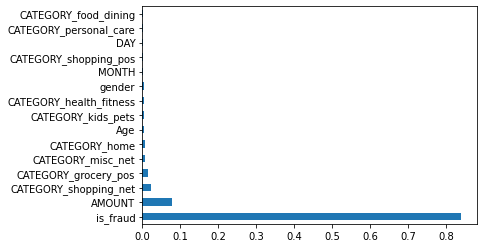

In [89]:
#ExtraTreesClassifier
X = select_data.iloc[:,0:22]  #independent columns
y = select_data.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

*Important
Based on the chart above, we are going extract the features that is going to be used for the model ExtraTreesClassifier


In [90]:
#using train extra tree
select_data_train_extra_tree = df_downsampled[['is_fraud', 'CATEGORY_personal_care',
'DAY',
'CATEGORY_shopping_pos',
'CATEGORY_food_dining',
'MONTH',
'gender',
'CATEGORY_kids_pets',
'CATEGORY_health_fitness',
'Age',
'CATEGORY_home',
'CATEGORY_misc_net',
'CATEGORY_grocery_pos',
'CATEGORY_shopping_net',
'AMOUNT']]


Pandas nlargest() method is used to get n largest values from a data frame or a series.
in the next line we are going to consider 15 feature that python will extract automaticaly to us.

So, we have a selection of features based on nlargest and another one based on the ExtraTreesClassifier


In [91]:
#nlargest
print(select_data.corr().abs().nlargest(15, 'is_fraud').index)

Index(['is_fraud', 'AMOUNT', 'CATEGORY_shopping_net', 'CATEGORY_grocery_pos',
       'CATEGORY_home', 'CATEGORY_misc_net', 'CATEGORY_kids_pets',
       'CATEGORY_health_fitness', 'CATEGORY_food_dining',
       'CATEGORY_personal_care', 'MONTH', 'Age', 'gender', 'CATEGORY_misc_pos',
       'CATEGORY_grocery_net'],
      dtype='object')


In [92]:
#using nlargest
select_data_train_abs_nlargest = df_downsampled[['is_fraud', 'AMOUNT', 'CATEGORY_shopping_net', 'CATEGORY_grocery_pos',
       'CATEGORY_home', 'CATEGORY_misc_net', 'CATEGORY_kids_pets',
       'CATEGORY_health_fitness', 'CATEGORY_food_dining',
       'CATEGORY_personal_care', 'MONTH', 'Age', 'gender', 'CATEGORY_misc_pos',
       'CATEGORY_grocery_net']]

In [93]:
#Select Test Data - extra tree
select_data_test_extra_tree = df_test[['is_fraud', 'CATEGORY_personal_care',
'DAY',
'CATEGORY_shopping_pos',
'CATEGORY_food_dining',
'MONTH',
'gender',
'CATEGORY_kids_pets',
'CATEGORY_health_fitness',
'Age',
'CATEGORY_home',
'CATEGORY_misc_net',
'CATEGORY_grocery_pos',
'CATEGORY_shopping_net',
'AMOUNT']]

select_data_test_abs_nlargest = df_test[['is_fraud', 'AMOUNT', 'CATEGORY_shopping_net', 'CATEGORY_grocery_pos',
       'CATEGORY_home', 'CATEGORY_misc_net', 'CATEGORY_kids_pets',
       'CATEGORY_health_fitness', 'CATEGORY_food_dining',
       'CATEGORY_personal_care', 'MONTH', 'Age', 'gender', 'CATEGORY_misc_pos',
       'CATEGORY_grocery_net']]

In [94]:
# Prepare X_train y_train
X_train_extra_tree = select_data_train_extra_tree[['CATEGORY_personal_care',
'DAY',
'CATEGORY_shopping_pos',
'CATEGORY_food_dining',
'MONTH',
'gender',
'CATEGORY_kids_pets',
'CATEGORY_health_fitness',
'Age',
'CATEGORY_home',
'CATEGORY_misc_net',
'CATEGORY_grocery_pos',
'CATEGORY_shopping_net',
'AMOUNT']]
y_train_extra_tree = select_data_train_extra_tree['is_fraud']

X_train_abs_nlargest = select_data_train_abs_nlargest[['AMOUNT', 'CATEGORY_shopping_net', 'CATEGORY_grocery_pos',
       'CATEGORY_home', 'CATEGORY_misc_net', 'CATEGORY_kids_pets',
       'CATEGORY_health_fitness', 'CATEGORY_food_dining',
       'CATEGORY_personal_care', 'MONTH', 'Age', 'gender', 'CATEGORY_misc_pos',
       'CATEGORY_grocery_net']]
y_train_abs_nlargest = select_data_train_abs_nlargest['is_fraud']

In [95]:
# Prepare X_test y_test
X_test_extra_tree = select_data_test_extra_tree[['CATEGORY_personal_care',
'DAY',
'CATEGORY_shopping_pos',
'CATEGORY_food_dining',
'MONTH',
'gender',
'CATEGORY_kids_pets',
'CATEGORY_health_fitness',
'Age',
'CATEGORY_home',
'CATEGORY_misc_net',
'CATEGORY_grocery_pos',
'CATEGORY_shopping_net',
'AMOUNT']]
y_test_extra_tree = select_data_test_extra_tree['is_fraud']

X_test_abs_nlargest = select_data_test_abs_nlargest[['AMOUNT', 'CATEGORY_shopping_net', 'CATEGORY_grocery_pos',
       'CATEGORY_home', 'CATEGORY_misc_net', 'CATEGORY_kids_pets',
       'CATEGORY_health_fitness', 'CATEGORY_food_dining',
       'CATEGORY_personal_care', 'MONTH', 'Age', 'gender', 'CATEGORY_misc_pos',
       'CATEGORY_grocery_net']]
y_test_abs_nlargest = select_data_test_abs_nlargest['is_fraud']

In [96]:
#Scaler Data
from sklearn import preprocessing

# Scale X_train
# Extra Tree
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_extra_tree)
X_train_extra_tree_scaler = pd.DataFrame(newValue, columns=X_train_extra_tree.columns)
X_train_extra_tree_scaler

,CATEGORY_personal_care,DAY,CATEGORY_shopping_pos,CATEGORY_food_dining,MONTH,gender,CATEGORY_kids_pets,CATEGORY_health_fitness,Age,CATEGORY_home,CATEGORY_misc_net,CATEGORY_grocery_pos,CATEGORY_shopping_net,AMOUNT
0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.580247,0.0,0.0,0.0,0.0,0.003994
1,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.296296,0.0,1.0,0.0,0.0,0.000900
2,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.506173,0.0,0.0,1.0,0.0,0.008795
3,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.185185,0.0,0.0,1.0,0.0,0.008524
4,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.703704,0.0,0.0,0.0,0.0,0.004474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15169,0.0,0.666667,0.0,0.0,0.454545,1.0,0.0,0.0,0.370370,0.0,0.0,1.0,0.0,0.004588
15170,0.0,0.666667,0.0,0.0,0.454545,1.0,0.0,0.0,0.135802,0.0,0.0,0.0,0.0,0.000635
15171,0.0,0.666667,0.0,0.0,0.454545,0.0,0.0,0.0,0.395062,0.0,0.0,1.0,0.0,0.006693
15172,0.0,0.666667,0.0,0.0,0.454545,0.0,0.0,0.0,0.358025,0.0,1.0,0.0,0.0,0.005938


In [97]:
# Abs nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_train_abs_nlargest)
X_train_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_train_abs_nlargest.columns)
X_train_abs_nlargest_scaler

,AMOUNT,CATEGORY_shopping_net,CATEGORY_grocery_pos,CATEGORY_home,CATEGORY_misc_net,CATEGORY_kids_pets,CATEGORY_health_fitness,CATEGORY_food_dining,CATEGORY_personal_care,MONTH,Age,gender,CATEGORY_misc_pos,CATEGORY_grocery_net
0,0.003994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.580247,0.0,0.0,0.0
1,0.000900,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.296296,0.0,0.0,0.0
2,0.008795,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.506173,1.0,0.0,0.0
3,0.008524,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.185185,0.0,0.0,0.0
4,0.004474,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.703704,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15169,0.004588,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.370370,1.0,0.0,0.0
15170,0.000635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.135802,1.0,0.0,0.0
15171,0.006693,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.454545,0.395062,0.0,0.0,0.0
15172,0.005938,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.454545,0.358025,0.0,0.0,0.0


Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. We use the sklearn MinMaxScaler


In [98]:
#Normalization for the columns in the Extra tree 
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_extra_tree)
X_test_extra_tree_scaler = pd.DataFrame(newValue, columns=X_test_extra_tree.columns)
X_test_extra_tree_scaler

,CATEGORY_personal_care,DAY,CATEGORY_shopping_pos,CATEGORY_food_dining,MONTH,gender,CATEGORY_kids_pets,CATEGORY_health_fitness,Age,CATEGORY_home,CATEGORY_misc_net,CATEGORY_grocery_pos,CATEGORY_shopping_net,AMOUNT
0,0.0,0.133333,1.0,0.0,0.0,0.0,0.0,0.0,0.123457,0.0,0.0,0.0,0.0,0.000265
1,0.0,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.098765,1.0,0.0,0.0,0.0,0.004544
2,0.0,0.133333,0.0,0.0,0.0,0.0,1.0,0.0,0.382716,0.0,0.0,0.0,0.0,0.003776
3,0.0,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,1.0,0.0,0.0,0.0,0.000746
4,0.0,0.133333,0.0,0.0,0.0,1.0,0.0,0.0,0.098765,0.0,0.0,0.0,1.0,0.000341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515714,0.0,1.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.481481,0.0,0.0,0.0,0.0,0.001879
515715,0.0,1.000000,0.0,0.0,1.0,1.0,1.0,0.0,0.074074,0.0,0.0,0.0,0.0,0.004868
515716,0.0,1.000000,0.0,0.0,1.0,0.0,1.0,0.0,0.296296,0.0,0.0,0.0,0.0,0.003772
515717,0.0,1.000000,0.0,0.0,1.0,1.0,0.0,0.0,0.493827,0.0,0.0,0.0,0.0,0.000307


In [99]:
#Normalization for the columns in the nlargest
scaler = preprocessing.MinMaxScaler()
newValue = scaler.fit_transform(X_test_abs_nlargest)
X_test_abs_nlargest_scaler = pd.DataFrame(newValue, columns=X_test_abs_nlargest.columns)
X_test_abs_nlargest_scaler

,AMOUNT,CATEGORY_shopping_net,CATEGORY_grocery_pos,CATEGORY_home,CATEGORY_misc_net,CATEGORY_kids_pets,CATEGORY_health_fitness,CATEGORY_food_dining,CATEGORY_personal_care,MONTH,Age,gender,CATEGORY_misc_pos,CATEGORY_grocery_net
0,0.000265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.123457,0.0,0.0,0.0
1,0.004544,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098765,1.0,0.0,0.0
2,0.003776,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.382716,0.0,0.0,0.0
3,0.000746,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.0,0.0
4,0.000341,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098765,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515714,0.001879,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.481481,1.0,0.0,0.0
515715,0.004868,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.074074,1.0,0.0,0.0
515716,0.003772,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.296296,0.0,0.0,0.0
515717,0.000307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.493827,1.0,0.0,0.0



### Model LogisticRegression
Logistic regression is a technique for predicting a numerical value, that is used for supervised learning. In this case, we want to classify and identify the fraudelent records.

Because the output of our model is based on true or false, we can apply logistic regression into this study case


In [100]:
#Model
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [101]:
# Extra Tree
model_ext = LogisticRegression(random_state=42)
model_ext.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest
model_nr = LogisticRegression(random_state=0)
model_nr.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

LogisticRegression(random_state=0)

In [102]:
# Extra Tree - Predict
y_pred_extra_tree_scaler = model_ext.predict(X_test_extra_tree_scaler)

# nlargest - Predict
y_pred_abs_nlargest_scaler = model_nr.predict(X_test_abs_nlargest_scaler)

In [103]:
# Extra Tree - Confusion matrix
print("Select Data By Extra Tree")
print(pd.DataFrame(confusion_matrix(y_test_extra_tree,y_pred_extra_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

# nlargest - Confusion matrix
print("Select Data By Abs nlargest")
print(pd.DataFrame(confusion_matrix(y_test_abs_nlargest,y_pred_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative']))

Select Data By Extra Tree
                 Predicted Positive  Predicted Nagative
Actual Positive              466032               47710
Actual Negative                 604                1373
Select Data By Abs nlargest
                 Predicted Positive  Predicted Nagative
Actual Positive              465376               48366
Actual Negative                 586                1391


In [104]:
# Extra Tree - Classification Report
print("Classification report (Select Data By Extra Tree)")
print(classification_report(y_test_extra_tree, y_pred_extra_tree_scaler))

# nlargest - Classification Report
print("Classification report (Select Data By Abs nlargest)")
print(classification_report(y_test_abs_nlargest, y_pred_abs_nlargest_scaler))

Classification report (Select Data By Extra Tree)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    513742
           1       0.03      0.69      0.05      1977

    accuracy                           0.91    515719
   macro avg       0.51      0.80      0.50    515719
weighted avg       0.99      0.91      0.95    515719

Classification report (Select Data By Abs nlargest)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    513742
           1       0.03      0.70      0.05      1977

    accuracy                           0.91    515719
   macro avg       0.51      0.80      0.50    515719
weighted avg       1.00      0.91      0.95    515719




The recall was really below 70% with logistic regression, even though the accuracy was high. This model still needs tuning and at the moment is not suitable for our problem.



Next, we use gini Selection for the decision tree model. We want to see if the combination of resample and a variety of depth can provide good results.


In [105]:
from sklearn.tree import DecisionTreeClassifier
model_dtc = DecisionTreeClassifier(criterion = "gini", max_depth=10,random_state=42, class_weight='balanced')

# Extra Tree - Fit Model
model_dtc.fit(X_train_extra_tree_scaler, y_train_extra_tree)

# nlargest - Fit Model
model_dtc.fit(X_train_abs_nlargest_scaler, y_train_abs_nlargest)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [106]:
# Extra Tree - Confusion matrix
print("Confusion Matrix")
pred_test_extrea_tree_scaler = model_dtc.predict(X_test_extra_tree_scaler)
pd.DataFrame(confusion_matrix(y_test_extra_tree,pred_test_extrea_tree_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix


,Predicted Positive,Predicted Nagative
Actual Positive,499514,14228
Actual Negative,1875,102



The feature that we have selected with ExtraTreesClassifier doesn't provide good results with the DecisionTreeClassifier MOdel. We only manage to predict 102 fraudulent records.


In [107]:
# nlargest - Confusion matrix
print("Confusion Matrix")
pred_test_abs_nlargest_scaler = model_dtc.predict(X_test_abs_nlargest_scaler)
pd.DataFrame(confusion_matrix(y_test_abs_nlargest,pred_test_abs_nlargest_scaler), columns=['Predicted Positive', 'Predicted Nagative'], index=['Actual Positive', 'Actual Negative'])

Confusion Matrix


,Predicted Positive,Predicted Nagative
Actual Positive,465796,47946
Actual Negative,1325,652



The features that we have selected with nLargest provided better results if we compare with the features that we selected with the ExtraTreeClassifier, but the prediction is still lower than 50% of the true positive results.



In [108]:
print("Using Feature Selection Extra Tree Classifier)")
print(classification_report(y_test_extra_tree, pred_test_extrea_tree_scaler))

print("Using Feature Selection nlargest)")
print(classification_report(y_test_abs_nlargest, pred_test_abs_nlargest_scaler))

Using Feature Selection Extra Tree Classifier)
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    513742
           1       0.01      0.05      0.01      1977

    accuracy                           0.97    515719
   macro avg       0.50      0.51      0.50    515719
weighted avg       0.99      0.97      0.98    515719

Using Feature Selection nlargest)
              precision    recall  f1-score   support

           0       1.00      0.91      0.95    513742
           1       0.01      0.33      0.03      1977

    accuracy                           0.90    515719
   macro avg       0.51      0.62      0.49    515719
weighted avg       0.99      0.90      0.95    515719




The classification report show high accuracy but the amount of transaction that this model was able to identify as fradulent is really low. The recall is less than 1 % when using the Selection features with Extra Tree Classifier. The recall for the Selection Features with nLargest is better but it is still lower than 35%. These two model is not suitable for the study case and we would need to retry differnt ML techniques in order to find a better solution

